In [1]:
%load_ext autoreload
%autoreload 2

### note: we will exclude rotations so far because they introduce interpolations in the masks which we need to re-evaluate

In [2]:
import torch

In [3]:
import random
import torch
import numpy as np
import os
import nibabel as nib
import torchvision
import torchio as tio
from monai import transforms as montransforms

from pathlib import Path

from torch.utils.data import Dataset

In [4]:
from dataset.BraTSDataset import BraTSDataset

In [5]:
def visualize_slice(x, y, sl=78):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
    for i, img in enumerate(x):
        ax[i].imshow(x[i,...,sl], cmap='gray')
        ax[i].axis('off')
    ax[-1].imshow(y[0, ..., sl])
    ax[-1].axis('off')
    plt.tight_layout()            
    plt.show()

In [14]:
from torch.utils.data import DataLoader, random_split
train, val = random_split(data, [0.5,0.5])

In [19]:
def visualize_segmentations(y, sl=78):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
    for i, img in enumerate(y):
        ax[i].imshow(y[i,...,sl])
        ax[i].axis('off')
    plt.tight_layout()            
    plt.show()

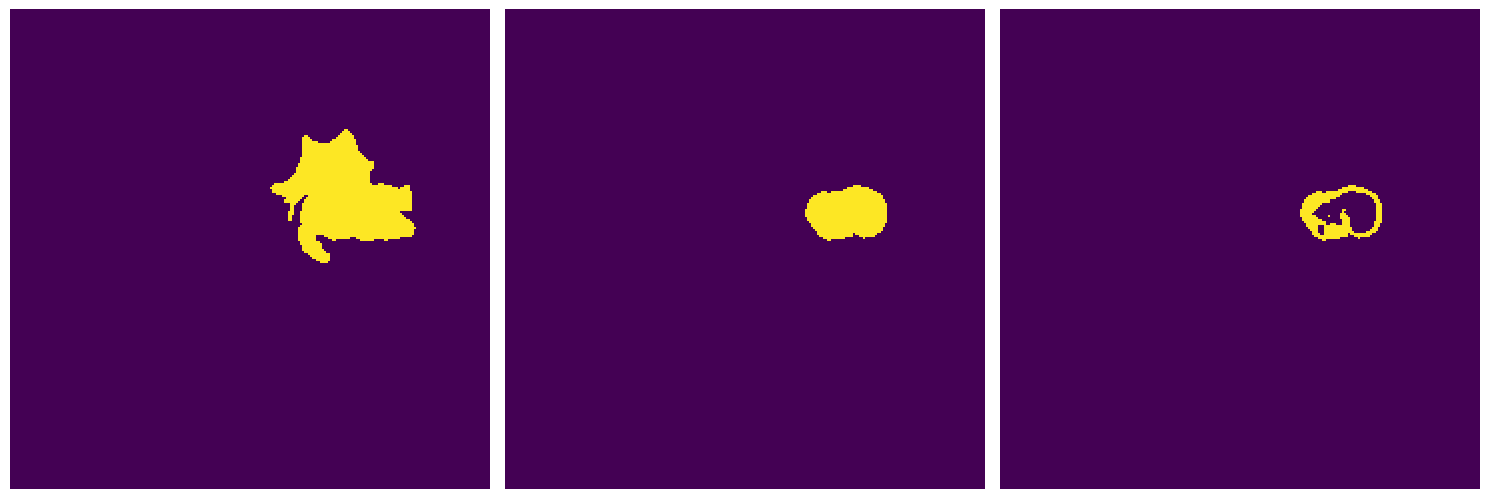

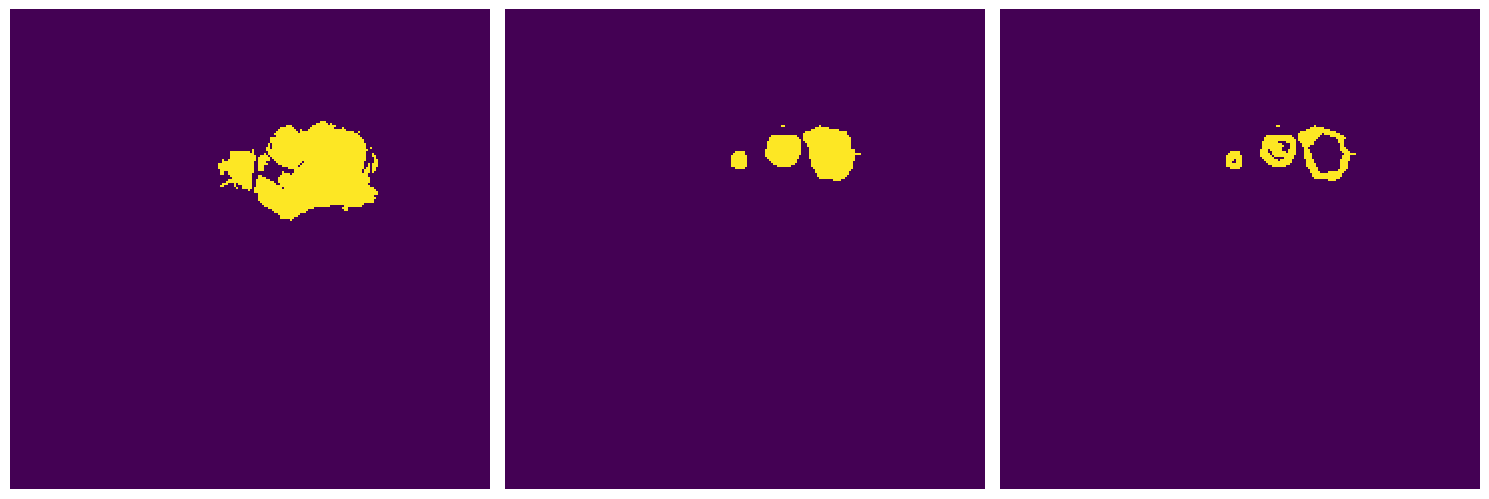

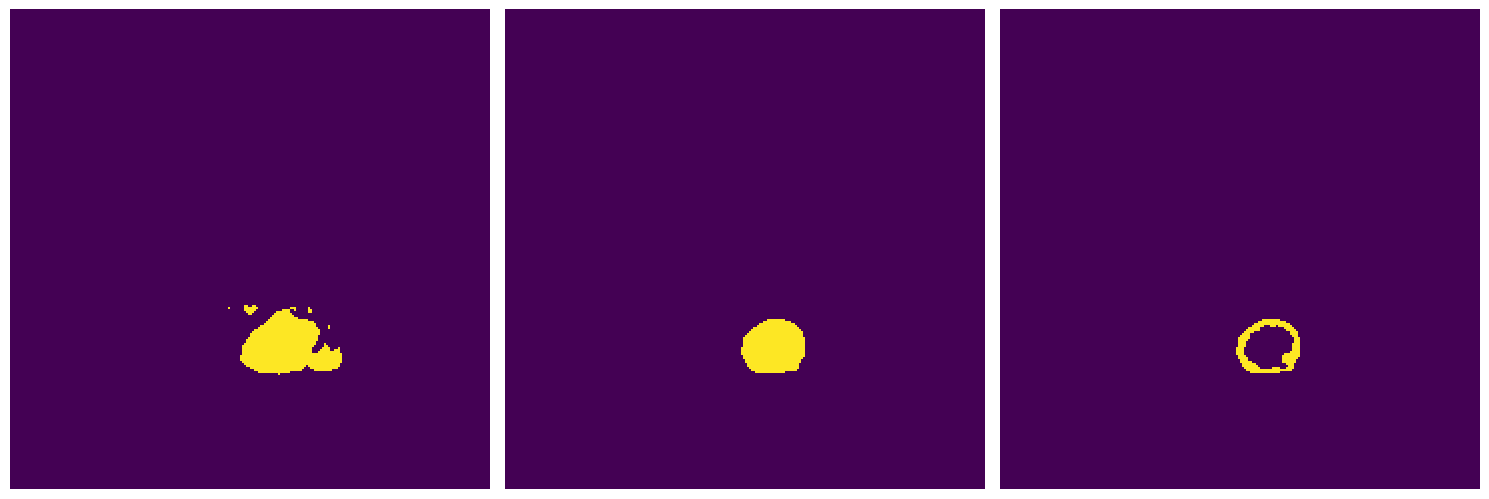

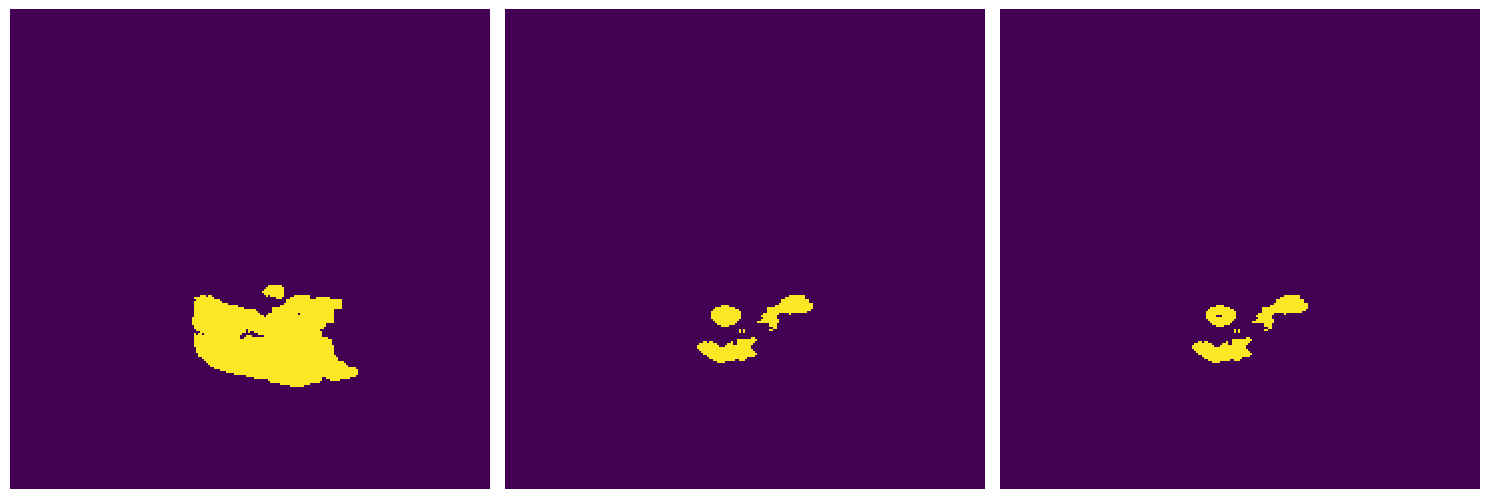

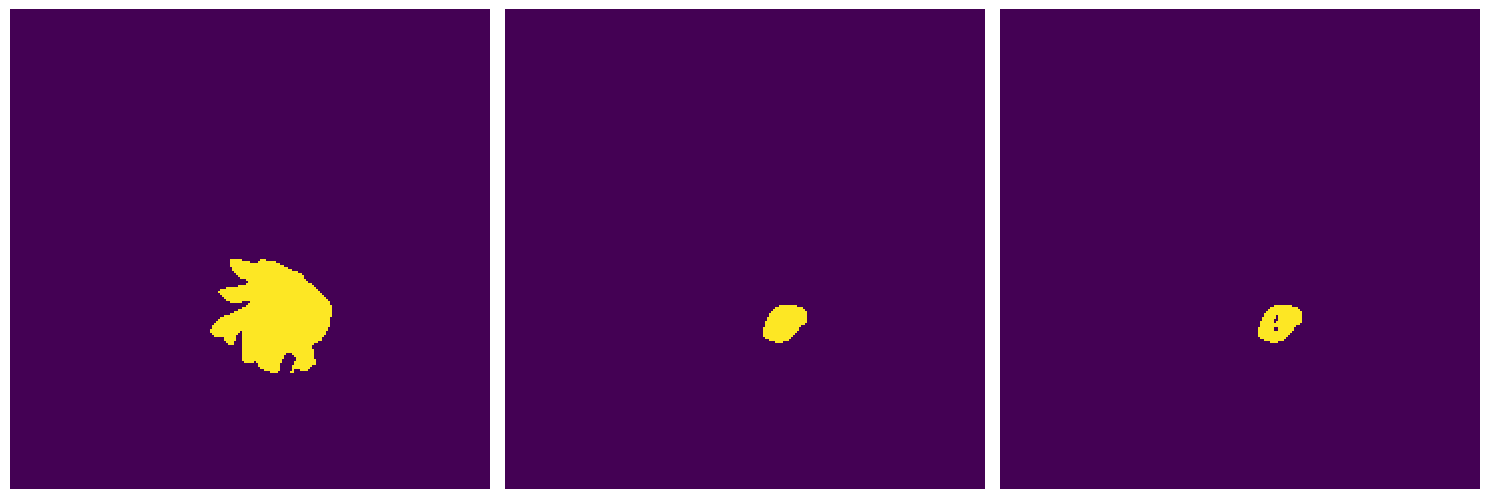

In [21]:
for i in range(5):
    visualize_segmentations(val[i][1])

In [6]:
train_path = "/cluster/51/emre/project/data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021"

In [7]:
data = BraTSDataset(train_path, training=False)

In [8]:
x, y = data[1000]

In [9]:
x.shape

(4, 240, 240, 155)

In [258]:
spatial_crop = montransforms.RandSpatialCrop(roi_size=data.crop_size, random_center=True, random_size=False)
flip = tio.RandomFlip(axes=(0, 1, 2), flip_probability=1)
scale_rotate = tio.RandomAffine(scales=0.1, degrees=15, isotropic=True)

In [11]:
import matplotlib.pyplot as plt

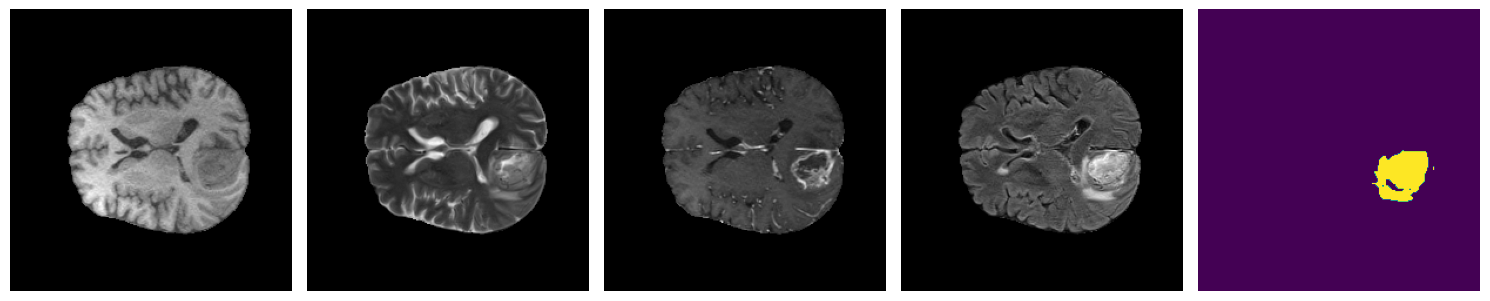

In [12]:
visualize_slice(x, y)

In [233]:
out = spatial_crop(np.concatenate([x,y]))
x_crop, y_crop = out[:-3], out[-3:]

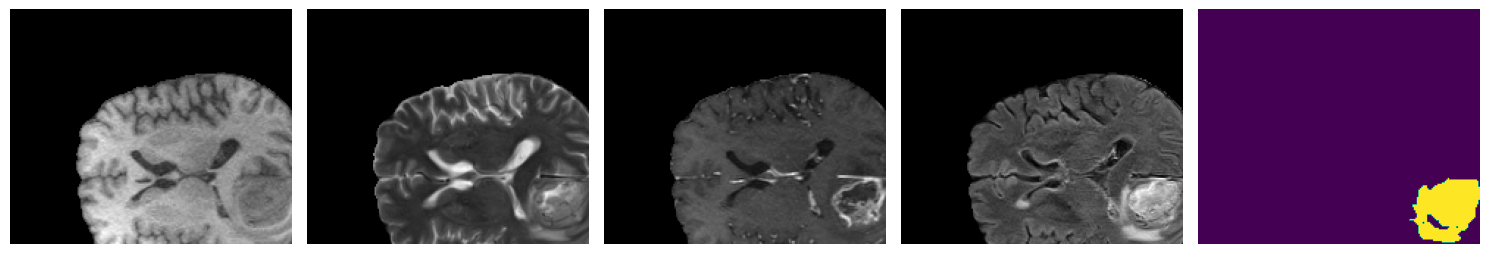

In [238]:
visualize_slice(x_crop, y_crop, 68)

In [241]:
out = flip(np.concatenate([x,y]))
x_flipped, y_flipped = out[:-3], out[-3:]

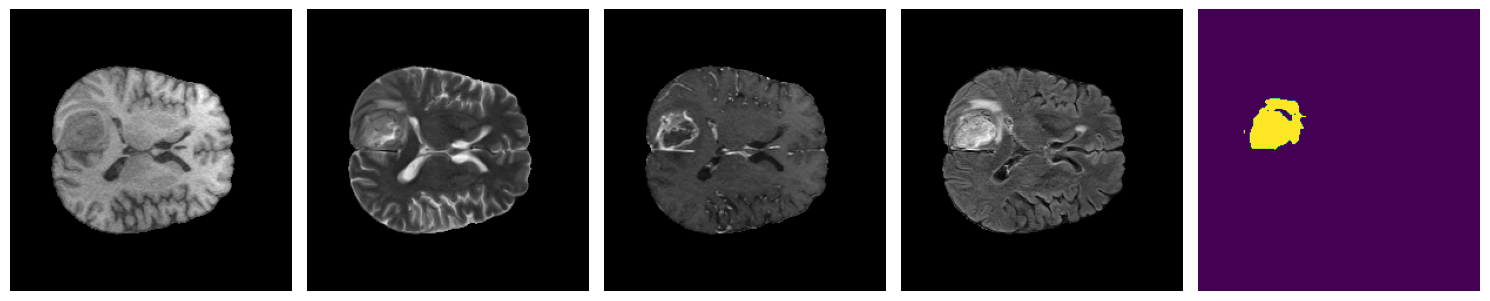

In [247]:
visualize_slice(x_flipped, y_flipped, 76)

### flip back

In [248]:
out = flip(np.concatenate([x_flipped,y_flipped]))
x_flipped2, y_flipped2 = out[:-3], out[-3:]

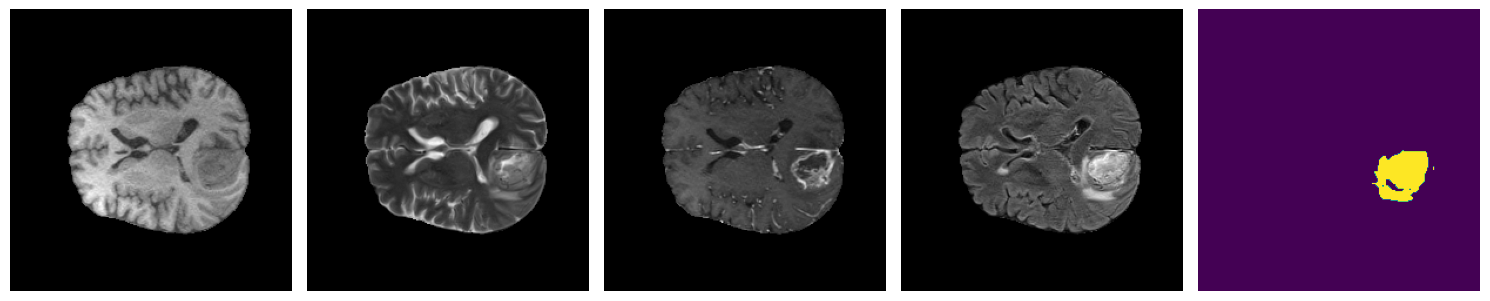

In [250]:
visualize_slice(x_flipped2, y_flipped2)

In [262]:
out = scale_rotate(np.concatenate([x,y]))
x_scale_rotate, y_scale_rotate = out[:-3], out[-3:]

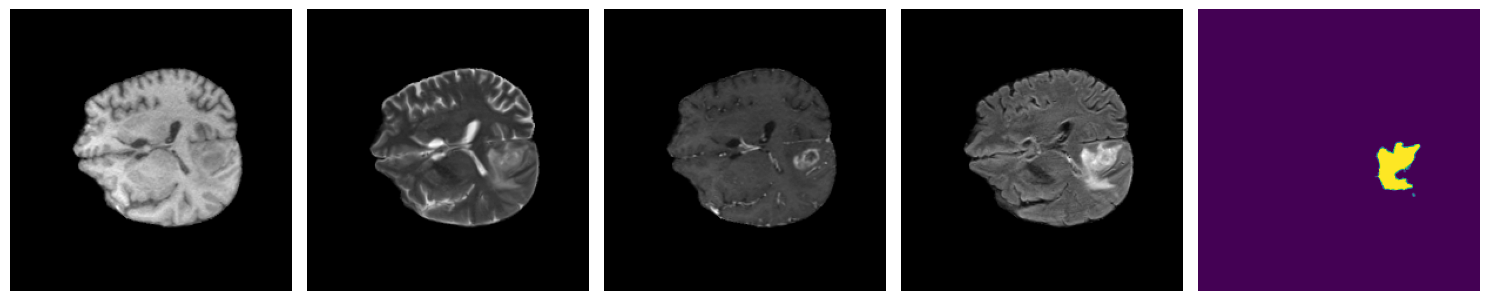

In [263]:
visualize_slice(x_scale_rotate, y_scale_rotate)

### rotate only around last axis

In [280]:
rotate_z = tio.RandomAffine(degrees=(0, 0, 90))

In [281]:
out = rotate_z(np.concatenate([x,y]))
x_rot, y_rot = out[:-3], out[-3:]

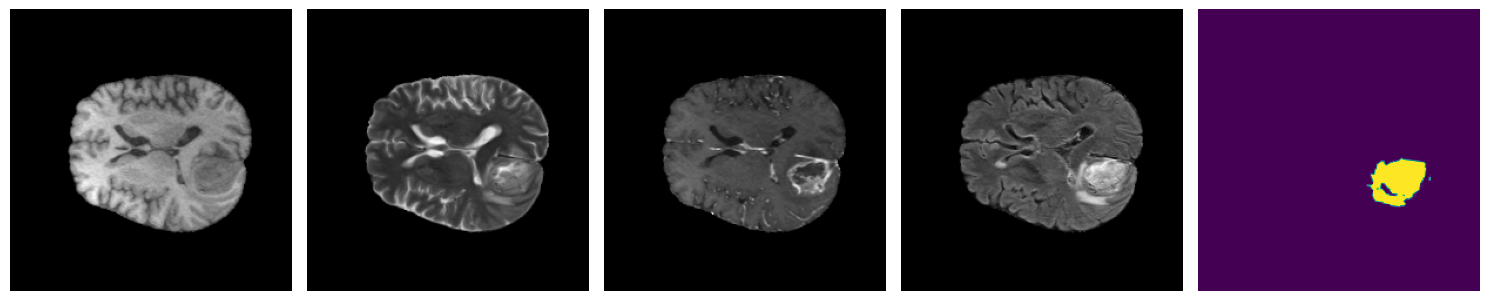

In [282]:
visualize_slice(x_rot, y_rot)

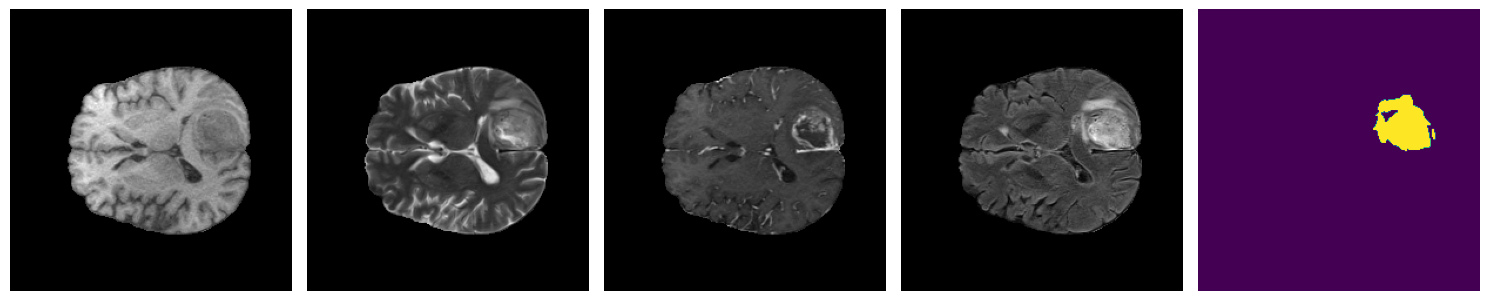

In [284]:
fl = tio.RandomFlip(axes=(1), flip_probability=1)
out = fl(np.concatenate([x_flipped,y_flipped]))
x_fl, y_fl = out[:-3], out[-3:]

visualize_slice(x_fl, y_fl)

In [1]:
5//2

2